In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from alpha_vantage.timeseries import TimeSeries

In [2]:
start = '2010-01-01'
end = '2023-12-31'

ts = TimeSeries(key='E9EYV24M353PT2TL', output_format='pandas')
df, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')  
# 'full' retrieves all available historical data
df = df[(df.index >= start) & (df.index <= end)]
df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-12-29,255.10,255.19,247.43,248.48,100891578.0
2023-12-28,263.66,265.13,252.71,253.18,113619943.0
2023-12-27,258.35,263.34,257.52,261.44,105853348.0
2023-12-26,254.49,257.97,252.91,256.61,86892382.0
2023-12-22,256.76,258.22,251.37,252.54,93370094.0


In [3]:
df.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0


In [4]:
df = df.reset_index()
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2023-12-29,255.10,255.19,247.43,248.48,100891578.0
1,2023-12-28,263.66,265.13,252.71,253.18,113619943.0
2,2023-12-27,258.35,263.34,257.52,261.44,105853348.0
3,2023-12-26,254.49,257.97,252.91,256.61,86892382.0
4,2023-12-22,256.76,258.22,251.37,252.54,93370094.0


In [5]:
df = df.drop(['date'], axis = 1)
df.head()

,1. open,2. high,3. low,4. close,5. volume
0,255.10,255.19,247.43,248.48,100891578.0
1,263.66,265.13,252.71,253.18,113619943.0
2,258.35,263.34,257.52,261.44,105853348.0
3,254.49,257.97,252.91,256.61,86892382.0
4,256.76,258.22,251.37,252.54,93370094.0


In [6]:
print(df.columns)

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


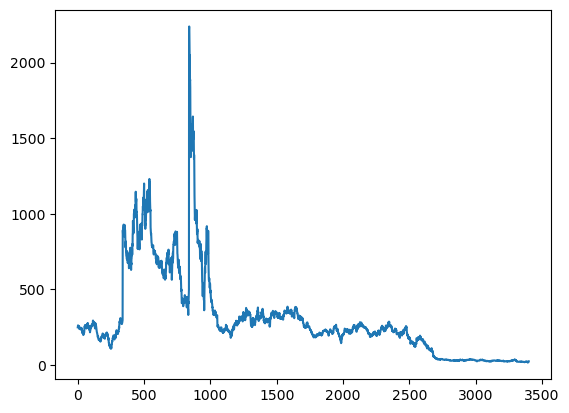

In [7]:
plt.plot(df['4. close'])

In [8]:
ma100 = df['4. close'].rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3395    21.38745
3396    21.23375
3397    21.11935
3398    21.04775
3399    20.98775
Name: 4. close, Length: 3400, dtype: float64

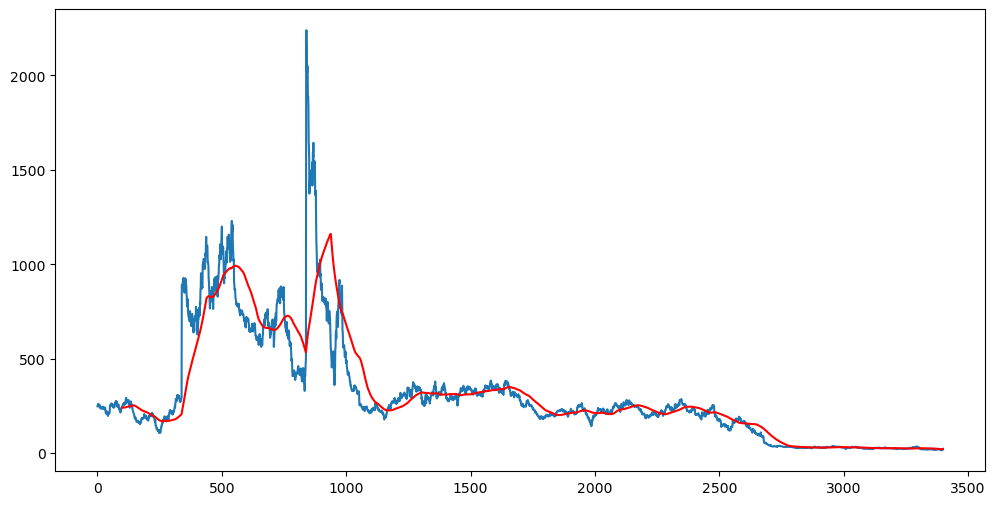

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df['4. close'])
plt.plot(ma100, 'r')

In [10]:
ma200 = df['4. close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3395    23.785245
3396    23.756095
3397    23.737995
3398    23.731445
3399    23.726245
Name: 4. close, Length: 3400, dtype: float64

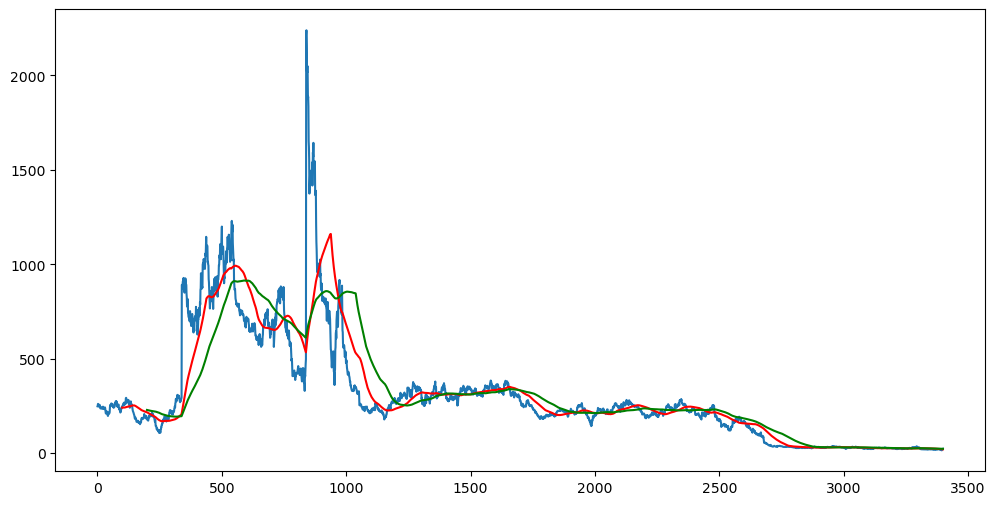

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df['4. close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3400, 5)

In [13]:
#spliting data into training and testing

data_training = pd.DataFrame(df['4. close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['4. close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2380, 1)
(1020, 1)


In [14]:
data_training.head()

,4. close
0,248.48
1,253.18
2,261.44
3,256.61
4,252.54


In [15]:
data_testing.head()

,4. close
2380,215.40
2381,217.16
2382,219.58
2383,226.70
2384,218.13


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.065886  ],
       [0.0680919 ],
       [0.07196865],
       ...,
       [0.05232206],
       [0.05277263],
       [0.05252862]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2280, 100, 1)

In [20]:
# ML model

In [21]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
#tf.losses.sparse_softmax_cross_entropy is deprecated, and you're encouraged to use tf.compat.v1.losses.sparse_softmax_cross_entropy instead. TensorFlow often deprecates certain functions or modules in newer releases.

In [24]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

72/72 [==============================] - 9s 84ms/step - loss: 0.0104
Epoch 2/50
72/72 [==============================] - 6s 86ms/step - loss: 0.0048
Epoch 3/50
72/72 [==============================] - 6s 84ms/step - loss: 0.0042
Epoch 4/50
72/72 [==============================] - 6s 87ms/step - loss: 0.0039
Epoch 5/50
72/72 [==============================] - 6s 89ms/step - loss: 0.0038
Epoch 6/50
72/72 [==============================] - 6s 88ms/step - loss: 0.0032
Epoch 7/50
72/72 [==============================] - 6s 89ms/step - loss: 0.0030
Epoch 8/50
72/72 [==============================] - 6s 89ms/step - loss: 0.0029
Epoch 9/50
72/72 [==============================] - 6s 88ms/step - loss: 0.0023
Epoch 10/50
72/72 [==============================] - 7s 94ms/step - loss: 0.0023
Epoch 11/50
72/72 [==============================] - 6s 90ms/step - loss: 0.0022
Epoch 12/50
72/72 [==============================] - 6s 90ms/step - loss: 0.0024
Epoch 13/50
72/72 [================

In [27]:
model.save('keras_model.h5')

C:\Users\suraj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
#sugested model to save

In [29]:
model.save('my_model.keras')

In [30]:
data_testing.head()

,4. close
2380,215.40
2381,217.16
2382,219.58
2383,226.70
2384,218.13


In [31]:
data_training.head()

,4. close
0,248.48
1,253.18
2,261.44
3,256.61
4,252.54


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = past_100_days._append(data_testing, ignore_index = True)

In [34]:
final_df.head()

,4. close
0,214.36
1,223.71
2,228.28
3,229.30
4,231.43


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.73475429],
       [0.76935317],
       [0.78626406],
       ...,
       [0.02279455],
       [0.02971433],
       [0.02993635]])

In [36]:
input_data.shape

(1120, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [38]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1020, 100, 1)
(1020,)


In [39]:
#making prediction

y_predicted = model.predict(x_test)

32/32 [==============================] - 1s 29ms/step


In [40]:
y_predicted.shape

(1020, 1)

In [41]:
y_test

array([0.73860272, 0.74511545, 0.75407046, ..., 0.02279455, 0.02971433,
       0.02993635])

In [42]:
y_predicted

array([[0.6510591 ],
       [0.6446492 ],
       [0.642162  ],
       ...,
       [0.02656069],
       [0.02592283],
       [0.02580882]], dtype=float32)

In [43]:
scaler.scale_

array([0.00370041])

In [44]:
scale_factor = 1/0.00571102
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

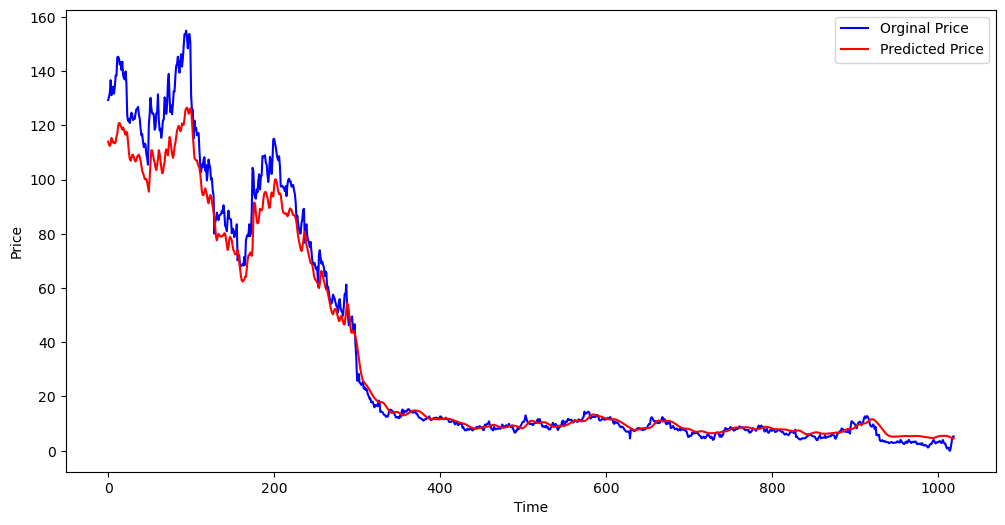

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orginal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()